# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

### Step 1: Import Splinter, BeautifulSoup, matplotlib, pandas

In [1]:
from   splinter          import Browser
from   bs4               import BeautifulSoup as soup
import matplotlib.pyplot                      as plt
import pandas                                 as pd
import numpy                                  as np

### Step 2: initialize the browser, Chrome in this case

In [2]:
browser = Browser('chrome')

### Step 3: Visit the Website

In [3]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 4: Scrape the Table

In [4]:
# Parse the website
html      = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Create a Beautiful Soup Object
table = html_soup.find('table', class_='table')


### Step 5: Get the table headers, create the empty dataframe

In [6]:
headers = []
for i in table.find_all('th'):
 title = i.text
 headers.append(title)

mars_facts_df = pd.DataFrame(columns = headers)
mars_facts_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure


### Step 6: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Extract all rows of data
# Store the table

mars_facts = []
# Create a for loop to fill mars_facts_df
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mars_facts_df)
    mars_facts_df.loc[length] = row

# Confirm DataFrame was created successfully
mars_facts_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 7: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

In [8]:
# Examine data type of each column
mars_facts_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
mars_facts_df['terrestrial_date'] = pd.to_datetime(mars_facts_df['terrestrial_date'])
mars_facts_df['min_temp']         = pd.to_numeric(mars_facts_df['min_temp'])
mars_facts_df['pressure']         = pd.to_numeric(mars_facts_df['pressure'])
mars_facts_df['sol']              = mars_facts_df['sol'].astype(int)
mars_facts_df['ls']              = mars_facts_df['ls'].astype(int)
mars_facts_df['month']              = mars_facts_df['month'].astype(int)
# Confirm type changes were successful by examining data types again
mars_facts_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 8: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


#### 8.1: How many months are there on Mars?

In [10]:
print (f'There are {len(pd.unique(mars_facts_df.month))} months in Mars')

There are 12 months in Mars


#### 8.2. How many Martian days' worth of data are there?

In [11]:
print(f'There are {len(pd.unique(mars_facts_df.sol))} days in the table')

There are 1867 days in the table


#### 8.3. What is the average low temperature by month?

In [12]:
mars_facts_df.groupby(mars_facts_df.month)['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

#### 8.4 # Plot the average temperature by month

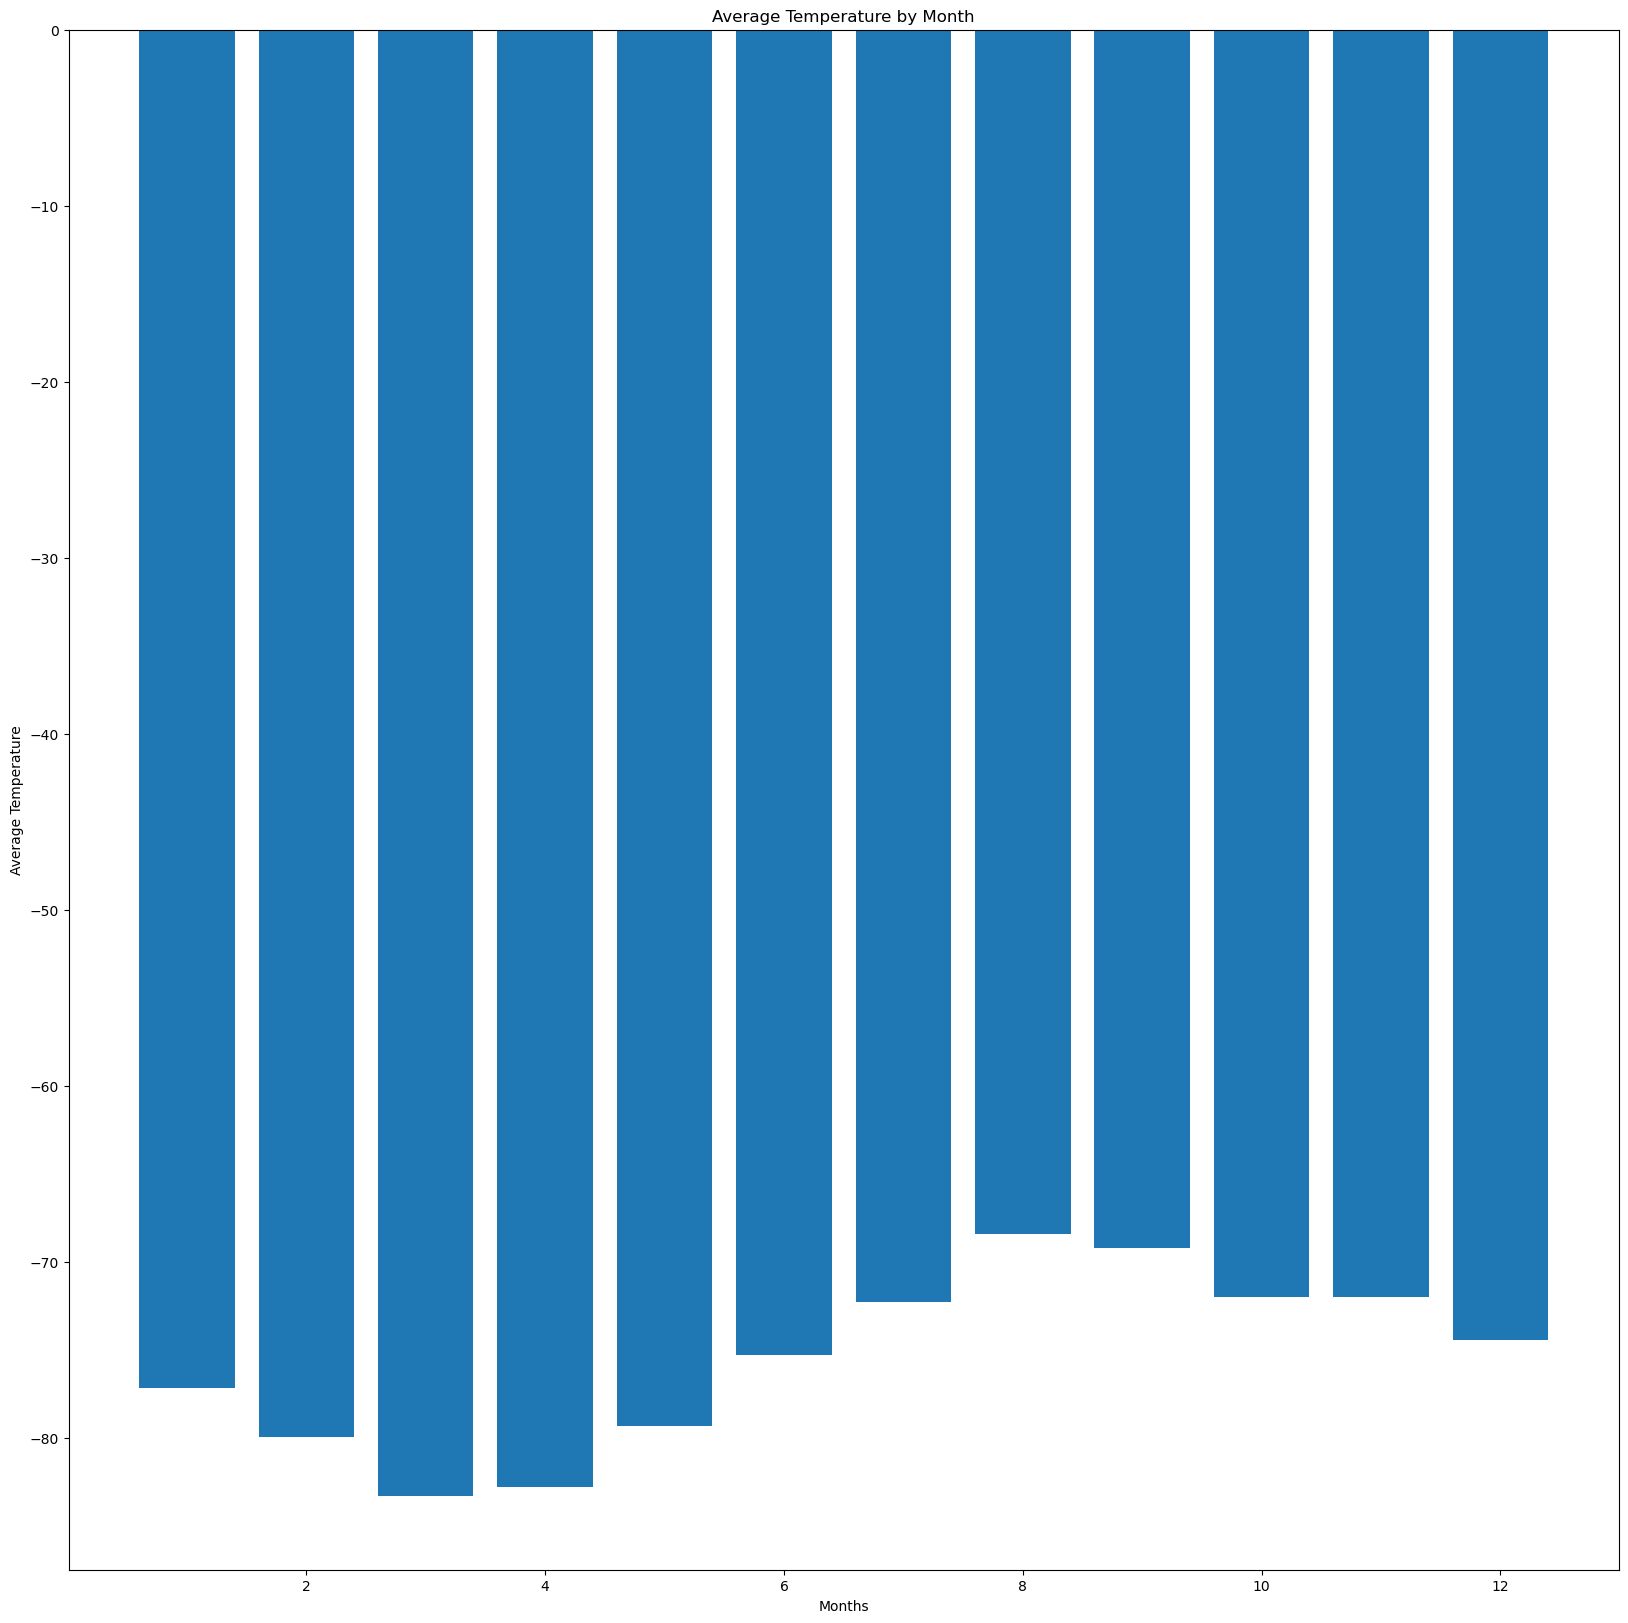

In [21]:
# Plot the average temperature by month
tm = pd.DataFrame(mars_facts_df.groupby(mars_facts_df.month)['min_temp'].mean())
tm.dtypes
Months = np.arange(1,13)
plt.figure(figsize=(20,20))
plt.bar(Months,tm.min_temp)
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Month')
plt.show()

#### 8.5: Identify the coldest and hottest months in Curiosity's location

Matplotlb and Pandas Graph are used to demonstrate different posibilities of implementation

Min. Temp: -83.30729166666667
Max. Temp: -68.38297872340425


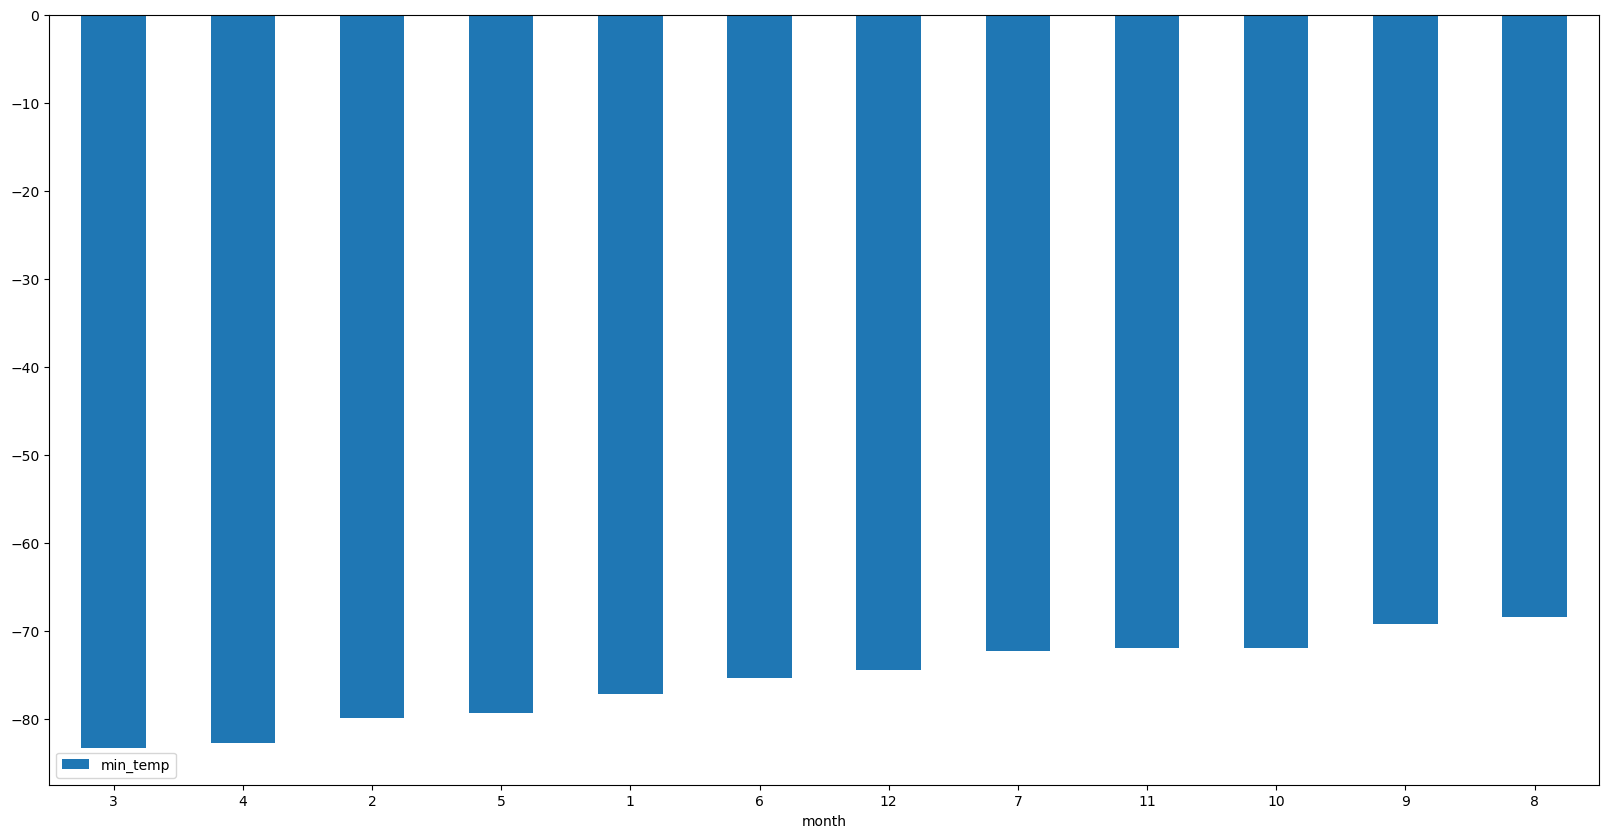

In [14]:
# Assuming all data was collected by Curiosity
# Plot the average temperature by month
tm = pd.DataFrame(mars_facts_df.groupby(mars_facts_df.month)['min_temp'].mean())
tm = tm.sort_values(by=['min_temp'])
tm_df = tm.reset_index()
tm_df = tm_df.sort_values(by=['min_temp'])
tm_df.plot.bar(figsize=(20, 10),x='month', y='min_temp', rot=0)
print(f'Min. Temp: {tm_df.iloc[0].min_temp}')
print(f'Max. Temp: {tm_df.iloc[11].min_temp}')

#### 8.6. Average pressure by Martian month

In [15]:
mars_facts_df.groupby(mars_facts_df.month)['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

#### 8.7 # Plot the average pressure by month

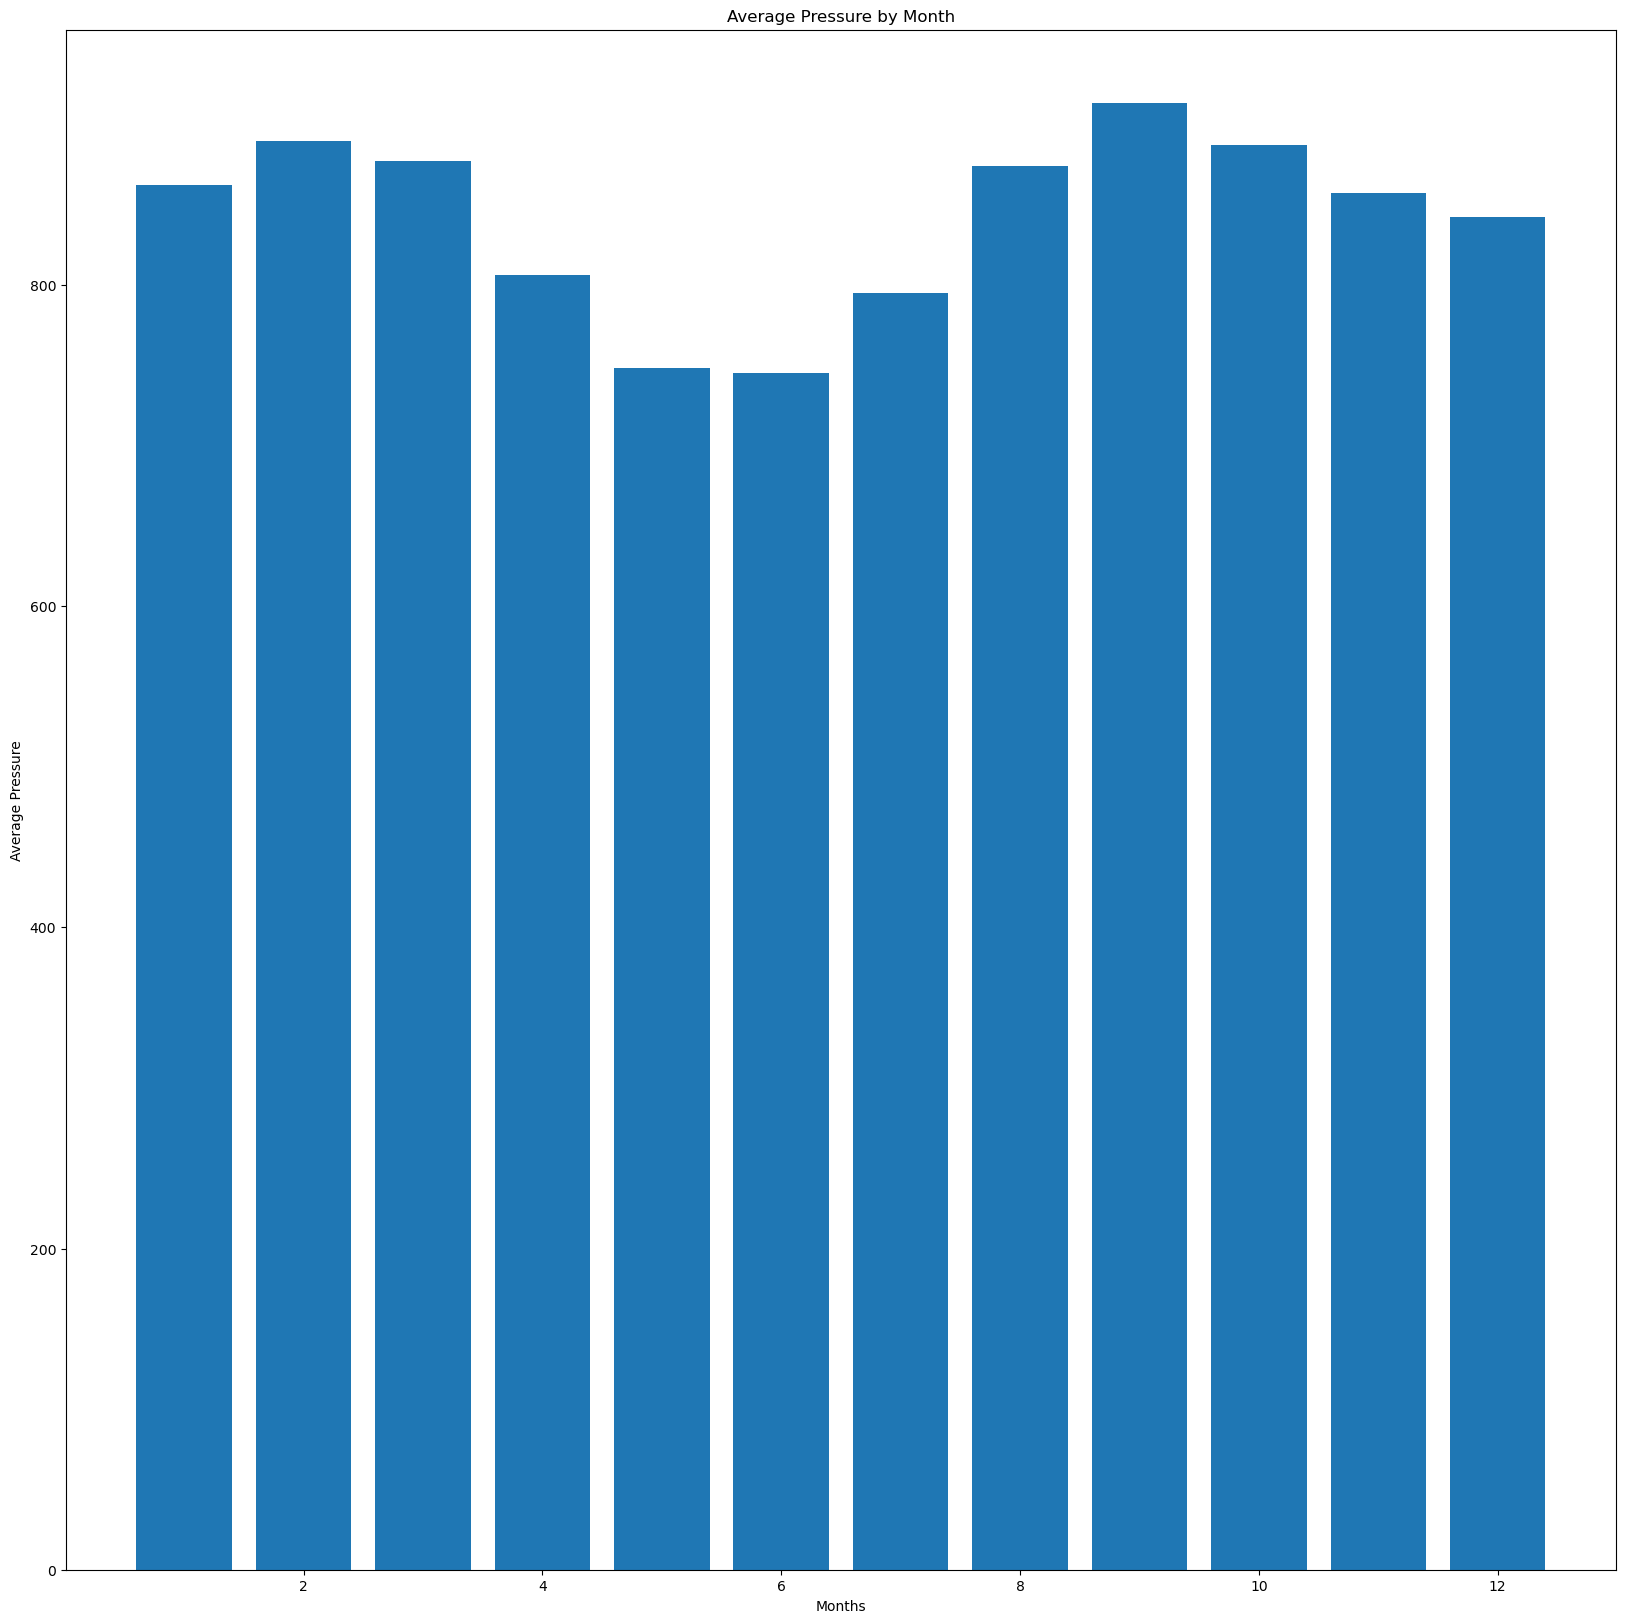

In [17]:

pm = pd.DataFrame(mars_facts_df.groupby(mars_facts_df.month)['pressure'].mean())
pm_df = pm.reset_index()
pm_df
Pressure = np.arange(1,13)
plt.figure(figsize=(20,20))
plt.bar(Pressure,pm_df.pressure)
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.show()

#### 8.7: How many terrestrial (earth) days are there in a Martian year?


There are 1867 days


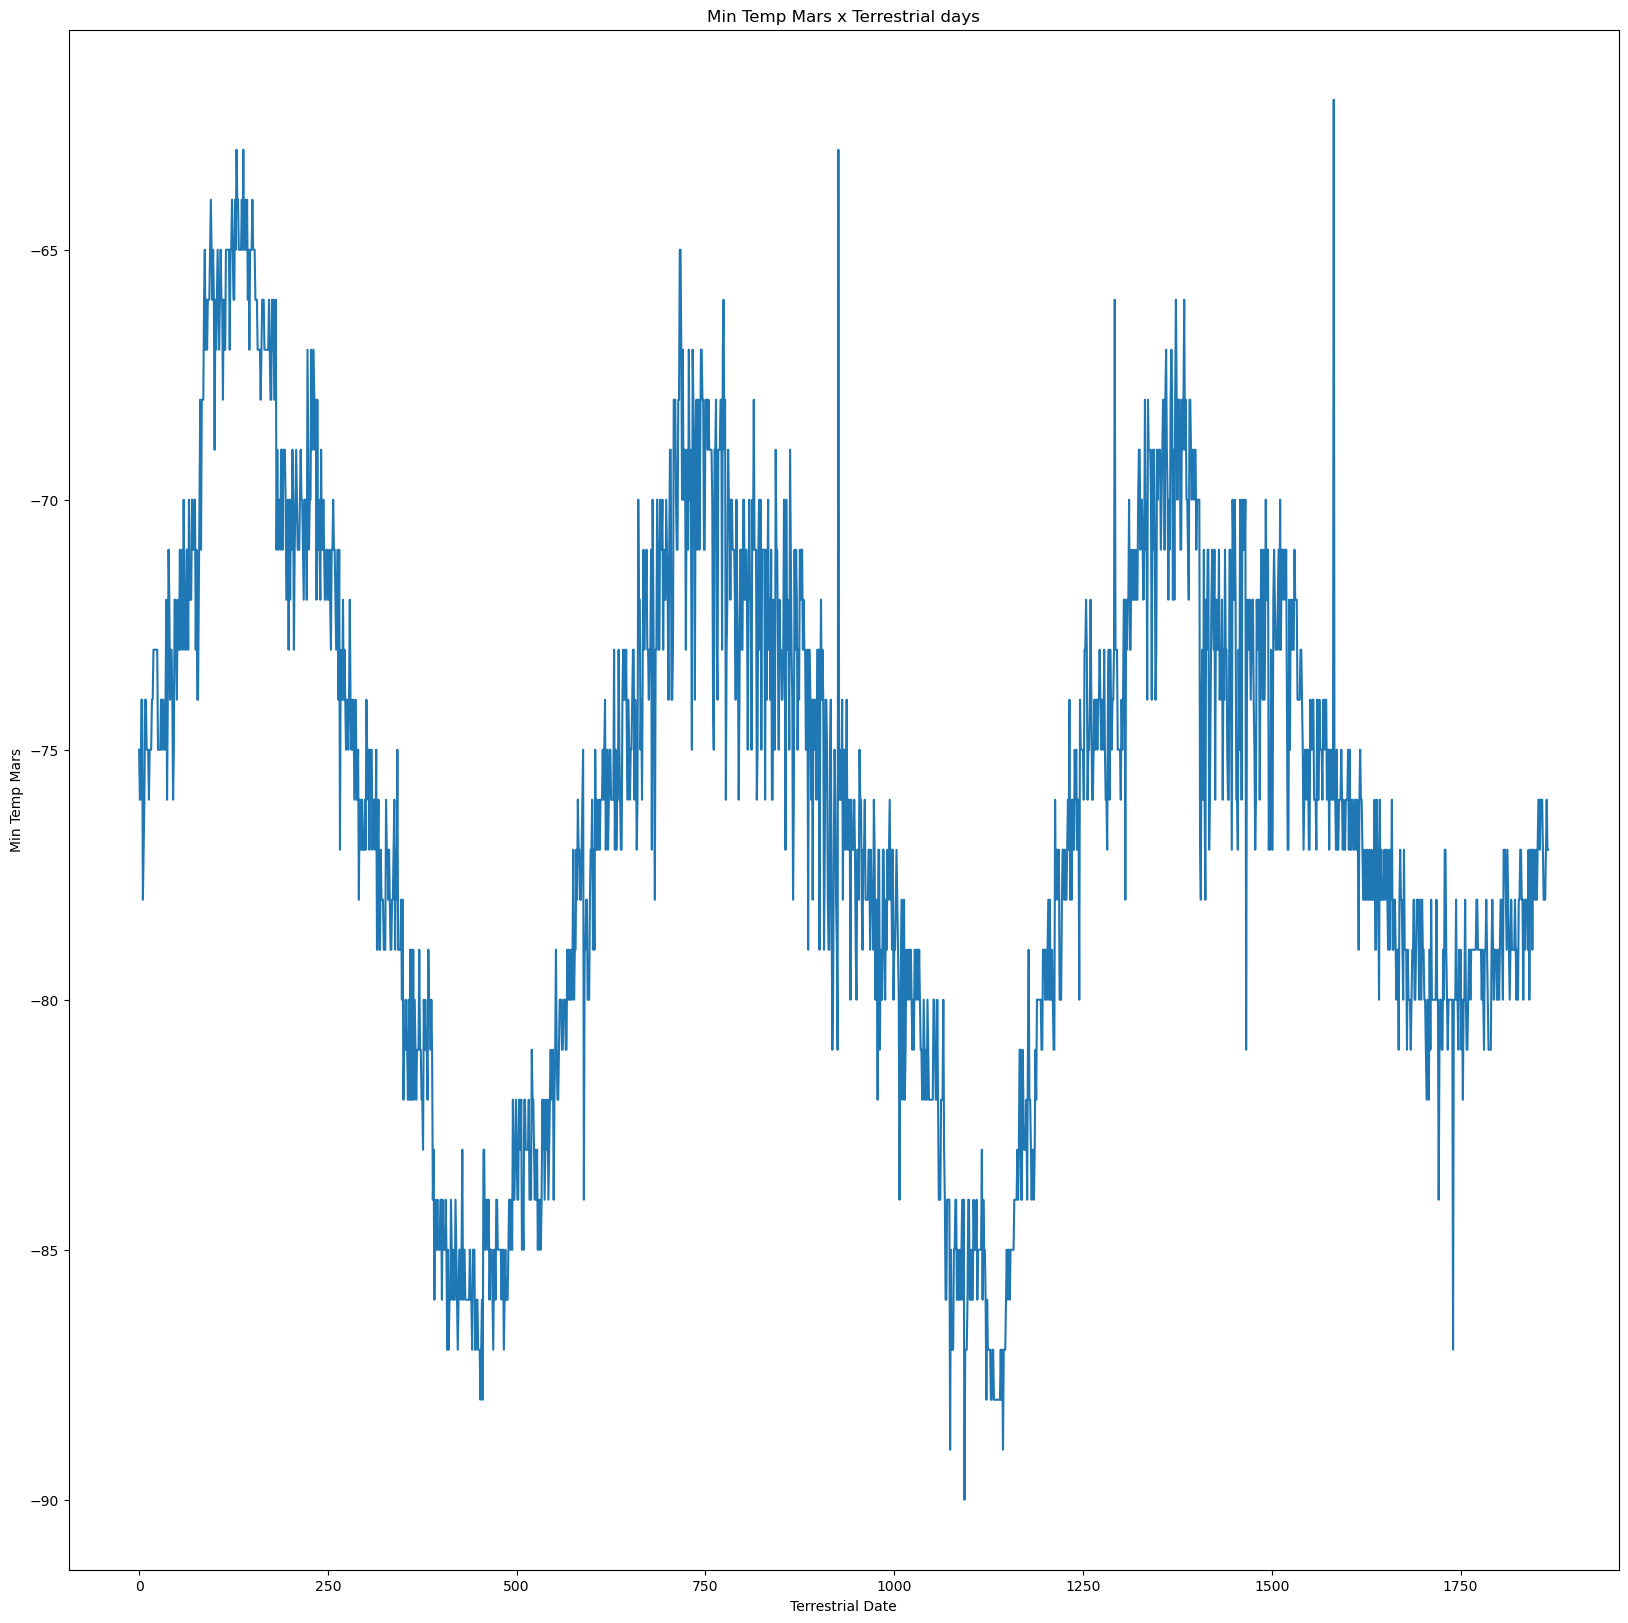

In [18]:
Earth_days = mars_facts_df.terrestrial_date
Mars_Temp = mars_facts_df.min_temp
print(f'There are {len(Earth_days)} days')
plt.figure(figsize=(20,20))
plt.plot(Mars_Temp)
plt.xlabel('Terrestrial Date')
plt.ylabel('Min Temp Mars')
plt.title('Min Temp Mars x Terrestrial days')
plt.show()

### Step 9: Save the Data

In [19]:
# Write the data to a CSV
mars_facts_df.to_csv('Mars_Facts.csv')

### Step 10: Dismiss the browser session

In [20]:
browser.quit()